# Cardiovascular Disease Project
#### By : Hala Alenazi & Mashael Alfehaid
____________

## Project Scope
- Our goal in this project is to predict the patient's condition.

## Data Description
After we obtained the datasets these are the features used:
- **Age** | Objective Feature | age | int (days).
- **Height** | Objective Feature | height | int (cm).
- **Weight** | Objective Feature | weight | float (kg). 
- **Gender** | Objective Feature | gender | categorical code. 
- **Systolic blood pressure** | Examination Feature | ap_hi | int. 
- **Diastolic blood pressure** | Examination Feature | ap_lo | int. 
- **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal. 
- **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal. 
- **Smoking** | Subjective Feature | smoke | binary. 
- **Alcohol intake** | Subjective Feature | alco | binary. 
- **Physical activity** | Subjective Feature | active | binary. 
- **Presence or absence of cardiovascular disease** | Target Variable | cardio | binary. 

- All of the dataset values were collected at the moment of medical examination.
- The datasets that will be used in this project is a public source from Kaggle.

____________
## Import the Main Modules to be Used

In [65]:
#imports Data exploration and visualization

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

____________

## Load Dataset

In [66]:
# Read the 'Cardiovascular Disease dataset.csv' dataset into an object named 'df'.

df = pd.read_csv('Cardiovascular Disease dataset.csv', sep = r';')

In [67]:
# showing the first 5 rows.

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [68]:
# Shows the number of rows and columns in the data

df.shape

(70000, 13)

In [69]:
#General information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


________

## Data Cleaning

- Check duplicates.
- Check null.
- Rename columns.
- convert [age] from days to years


In [70]:
# Check duplicates before 'id' 

df.duplicated().sum()

0

In [71]:
# Checking null values 

df.isnull().sum().sum()

0

In [72]:
#Show column names

df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [73]:
# Drop the id column 

df.drop('id', axis=1, inplace=True)

In [74]:
# Rename columns

df.rename(columns={'ap_hi': 'systolic_bp', 'ap_lo': 'diastolic_bp' ,'gluc':'glucose','alco':'alcohol', 'cardio':'disease'}, inplace=True)

In [75]:
# convert the num Categories into object to convert it to dummies letter.

df['gender'].replace(to_replace=[1, 2],value=['women','man'], inplace=True)
df['cholesterol'].replace(to_replace=[1, 2,3],value=['normal',' above_normal','well_above_normal'], inplace=True)
df['glucose'].replace(to_replace=[1, 2,3],value=['normal',' above_normal','well_above_normal'], inplace=True)


In [76]:
# convert the age from days to years

df['age'] = round(df['age'] / 365,1)

In [77]:
# Check d# Check duplicates after we removed the 'id'

df.duplicated().sum()

665

In [78]:
# remove the duplicates

df.drop_duplicates(inplace=True)

## Feature Engineering

In [79]:
### feature  1: BMI measure of body fat based on height and weight

df['BMI'] = (df['weight'] / (df['height']/100)**2)

In [80]:
# put BMI into category maybe we use it later

df.loc[(df["BMI"])<18.5, "BMI_class"] = "underweight"
df.loc[(df["BMI"]>=18.5) & (df["BMI"]<=24.9), "BMI_class"] = "Normal"
df.loc[(df["BMI"]>=25)&(df["BMI"]<=29.9), "BMI_class"] = "Overweight"
df.loc[(df["BMI"]>=30)&(df["BMI"]<=34.9), "BMI_class"] = "obese"
df.loc[(df["BMI"])>=35, "BMI_class"] = "extrem obese"

In [81]:
# feature 2: ratio between systolic blood pressure and diastolic blood pressure
 
df['ratio_S/D']=df['diastolic_bp']/df['systolic_bp']

In [82]:
#feature 3: Relationship of pressure with weight 

df['ratio_(S/D)/Weight']=df['weight']*df['ratio_S/D']

In [83]:
# feature 4: if he do all the wrong practices give it 1 otherwise 0

y=[]
df['relation_wp']=( (df.smoke==1)&(df.alcohol==1)&(df.active==0))
for i in df['relation_wp']:
    if i==True:
        y.append(1)
    else:
        y.append(0)

df['relation_wp']=y

In [84]:
# feature 5: age classification

df.loc[(df["age"] < 18), "age_class"] = "Young"
df.loc[(df["age"] > 18) & (df["age"] < 56), "age_class"] = "Mature"
df.loc[(df["age"] >= 56), "age_class"] = "Old"

In [85]:
# feature 6: blood_pressure classification

df.loc[(df["diastolic_bp"])<=89, "bp_class"] = "normal"
df.loc[(df["diastolic_bp"])>=90, "bp_class"] = "hyper"
df.loc[(df["systolic_bp"])<=120, "bp_class"] = "normal"
df.loc[(df["systolic_bp"])>120, "bp_class"] = "normal"
df.loc[(df["systolic_bp"])>=140, "bp_class"] = "hyper"

In [86]:
df.describe()

,age,height,weight,systolic_bp,diastolic_bp,smoke,alcohol,active,disease,BMI,ratio_S/D,ratio_(S/D)/Weight,relation_wp
count,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000,69335.000000
mean,53.341095,164.359847,74.280151,128.898536,96.791505,0.088931,0.054287,0.802639,0.502243,27.584710,0.807821,60.203650,0.004067
std,6.769497,8.238111,14.429928,154.745442,189.366796,0.284646,0.226585,0.398010,0.499999,6.109642,9.043818,608.111962,0.063645
min,29.600000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,3.471784,-4.666667,-345.333333,0.000000
25%,48.400000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.615385,41.333333,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000,26.438071,0.666667,46.666667,0.000000
75%,58.400000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,30.330215,0.666667,53.611264,0.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,298.666667,2088.000000,131544.000000,1.000000


## Get Dummies

In [87]:
df=pd.get_dummies(df,drop_first=True)

In [88]:
# save the clean file 

df.to_csv('Data.Clean.csv')

## build metrics

In [89]:
# befor start modeling we will build function for metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score


def My_metrics(y_test,y_pred):
    print(f'Accuracy:    {accuracy_score(y_test, y_pred)}\n') 
    print(f'F1 Score:    {f1_score(y_test, y_pred)}\n')
    print(f'Recall:      {precision_score(y_test, y_pred)}\n') 
    print(f'Precision:   {recall_score(y_test, y_pred)}\n' )

In [90]:
df.columns

Index(['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'smoke',
       'alcohol', 'active', 'disease', 'BMI', 'ratio_S/D',
       'ratio_(S/D)/Weight', 'relation_wp', 'gender_women',
       'cholesterol_normal', 'cholesterol_well_above_normal', 'glucose_normal',
       'glucose_well_above_normal', 'BMI_class_Overweight',
       'BMI_class_extrem obese', 'BMI_class_obese', 'BMI_class_underweight',
       'age_class_Old', 'bp_class_normal'],
      dtype='object')

## Beasline model

In [91]:
## beasline without the features Engineering

x = df.drop(df[['disease','BMI', 'ratio_S/D', 'ratio_(S/D)/Weight','relation_wp','BMI_class_Overweight',
       'BMI_class_extrem obese', 'BMI_class_obese', 'BMI_class_underweight',
       'age_class_Old', 'bp_class_normal']],axis=1)
y = df[['disease']]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.05, random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train ,test_size=0.05, random_state=42)


In [92]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7094320324735514

In [93]:
y_pred=lr.predict(x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.6933819064966606

F1 Score:    0.6779336734693877

Recall:      0.7016501650165017

Precision:   0.6557680444170265



##  Split the data into a test and training sets

In [94]:
## split dataset into train and test

x = df.drop('disease',axis=1)
y = df[['disease']]


x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.05, random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train ,test_size=0.05, random_state=42)

In [95]:
# for cleaning the the trian set form the outliers and explorat the data we will concat the x_train and y_train

train = pd.concat([x_train, y_train],axis=1)

### Remove outlire


In [96]:
# Statistic Overview
train.describe()

,age,height,weight,systolic_bp,diastolic_bp,smoke,alcohol,active,BMI,ratio_S/D,...,cholesterol_well_above_normal,glucose_normal,glucose_well_above_normal,BMI_class_Overweight,BMI_class_extrem obese,BMI_class_obese,BMI_class_underweight,age_class_Old,bp_class_normal,disease
count,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.00000,62574.000000,62574.000000,62574.000000,62574.000000,...,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000,62574.000000
mean,53.346222,164.365439,74.303283,128.939240,97.148880,0.08967,0.054543,0.803257,27.593839,0.780944,...,0.116614,0.848867,0.076821,0.358280,0.090165,0.174497,0.009397,0.396762,0.719804,0.502669
std,6.769563,8.269887,14.455165,152.950807,193.761632,0.28571,0.227089,0.397540,6.165064,4.568875,...,0.320962,0.358181,0.266309,0.479499,0.286421,0.379540,0.096482,0.489230,0.449099,0.499997
min,29.600000,55.000000,10.000000,-150.000000,-70.000000,0.00000,0.000000,0.000000,3.471784,-4.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.400000,159.000000,65.000000,120.000000,80.000000,0.00000,0.000000,1.000000,23.875115,0.615385,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.00000,0.000000,1.000000,26.438071,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,58.400000,170.000000,82.000000,140.000000,90.000000,0.00000,0.000000,1.000000,30.350330,0.666667,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,1.00000,1.000000,1.000000,298.666667,1088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Comment: as is shown in the above describe there are some outlirs value in the ( height, weight, systolic, diastolic ) columns

#### So i want to make sure that the outliers affected on the target or not?

In [97]:
print(len(train[(train.systolic_bp <80) & (train.disease == 1)]))
print(len(train[(train.systolic_bp <80) & (train.disease == 0)]))

82
99


In [98]:
print(len(train[(train.systolic_bp >250) & (train.disease == 1)]))
print(len(train[(train.systolic_bp >250) & (train.disease == 0)]))

23
15


In [99]:
print(len(train[(train.diastolic_bp <40) & (train.disease == 1)]))
print(len(train[(train.diastolic_bp <40) & (train.disease == 0)]))

23
32


In [100]:
print(len(train[(train.diastolic_bp >130) & (train.disease == 1)]))
print(len(train[(train.diastolic_bp>130) & (train.disease == 0)]))

785
144


#### Comment: as is shown in the above values there is no big diffrance if the person have the disease or not with outliers on blood pressure 

#### so we ganna remove the outliers

<AxesSubplot:xlabel='systolic_bp'>

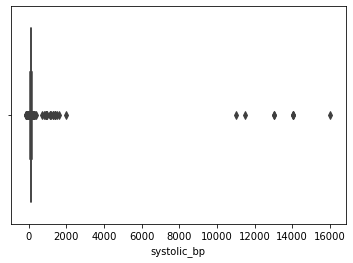

In [101]:
sns.boxplot(train['systolic_bp'])

In [102]:
# Drop some row that contain negative values and values over 250 in because in real life it can not be.

train.drop(train[train.systolic_bp <80].index, inplace=True)
train.drop(train[train.systolic_bp >250].index, inplace=True)


<AxesSubplot:xlabel='diastolic_bp'>

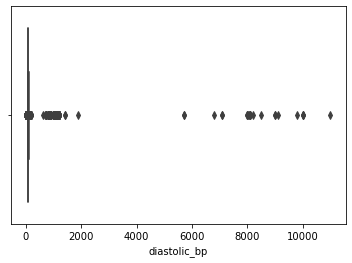

In [103]:
sns.boxplot(train['diastolic_bp'])

In [104]:
# Drop some row that contain negative values and values over 250 in because in real life it can not be.

train.drop(train[train.diastolic_bp <40].index, inplace=True)
train.drop(train[train.diastolic_bp >130].index, inplace=True)

#### Comment: Checking the outliers on height and weight if they affected on the target or not?

In [105]:
print(len(train[(train.height<120)&(train.disease == 1)]))
print(len(train[(train.height<120)&(train.disease == 0)]))

24
23


In [106]:
print(len(train[(train.height>225)&(train.disease == 1)]))
print(len(train[(train.height>225)&(train.disease == 0)]))

1
0


In [107]:
print(len(train[(train.weight<40)&(train.disease == 1)]))
print(len(train[(train.weight<40)&(train.disease == 0)]))

16
30


In [108]:
print(len(train[(train.weight>200)&(train.disease == 1)]))
print(len(train[(train.weight>200)&(train.disease == 0)]))

0
0


#### Comment: as is shown in the above values there is no big diffrance if the person have the disease or not with outliers on weight and height

#### So we ganna remove the outliers

<AxesSubplot:xlabel='height'>

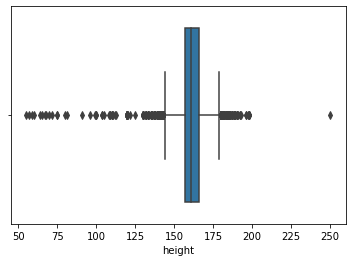

In [109]:
height_f=train[train.gender_women==1]
sns.boxplot(height_f['height'])

<AxesSubplot:xlabel='height'>

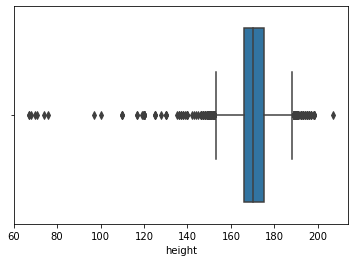

In [110]:
height_m=train[train.gender_women==0]
sns.boxplot(height_m['height'])

In [111]:
#drop some outliers

train.drop(train[train.height<120].index, inplace=True)
train.drop(train[train.height>225].index, inplace=True)

<AxesSubplot:xlabel='weight'>

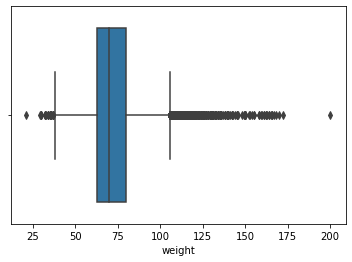

In [112]:
weight_f=train[train.gender_women==1]
sns.boxplot(weight_f['weight'])

<AxesSubplot:xlabel='weight'>

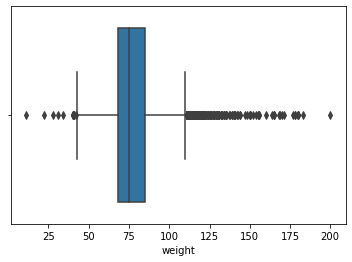

In [113]:
weight_m=train[train.gender_women==0]
sns.boxplot(weight_m['weight'])

In [114]:
train.drop(train[train.weight<40].index, inplace=True)
train.drop(train[train.weight>200].index, inplace=True)

In [115]:
train.describe()

,age,height,weight,systolic_bp,diastolic_bp,smoke,alcohol,active,BMI,ratio_S/D,...,cholesterol_well_above_normal,glucose_normal,glucose_well_above_normal,BMI_class_Overweight,BMI_class_extrem obese,BMI_class_obese,BMI_class_underweight,age_class_Old,bp_class_normal,disease
count,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,...,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000,61296.000000
mean,53.333293,164.434873,74.240778,126.718791,81.343367,0.089663,0.054278,0.802858,27.498018,0.645639,...,0.115978,0.849436,0.076661,0.359045,0.088097,0.174139,0.008793,0.395801,0.728514,0.497732
std,6.770676,7.944450,14.318580,16.732303,9.470651,0.285701,0.226567,0.397844,5.264509,0.060033,...,0.320201,0.357627,0.266055,0.479724,0.283438,0.379232,0.093361,0.489026,0.444730,0.499999
min,29.600000,120.000000,40.000000,80.000000,40.000000,0.000000,0.000000,0.000000,13.520822,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.400000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,23.875115,0.615385,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,26.397977,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.400000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,30.222222,0.666667,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,207.000000,200.000000,240.000000,130.000000,1.000000,1.000000,1.000000,108.169847,1.625000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
train.shape

(61296, 24)

-----------

## Data Exploration 


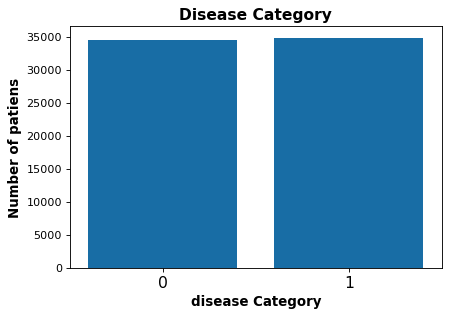

In [117]:
plt.figure(figsize=(6, 4), dpi=80)

sns.countplot(x=df['disease'],data=df, color='#0072BD')
plt.title("Disease Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of patiens", fontsize=12, fontweight='bold')
plt.xlabel("disease Category", fontsize=12, fontweight='bold')
plt.xticks(size=14)


plt.savefig('balane_data.png',dpi=100, bbox_inches='tight')

In [118]:
train_3=train.groupby('disease').count()
train_3['The rate patiens have the diseaseor']=train_3['age']/len(train)
train_3['The rate patiens have the diseaseor']

disease
0    0.502268
1    0.497732
Name: The rate patiens have the diseaseor, dtype: float64

#### Comment: for the above values and plot means that our data is balanced.

####  Now we will discover data and see the relationship between the features and the target

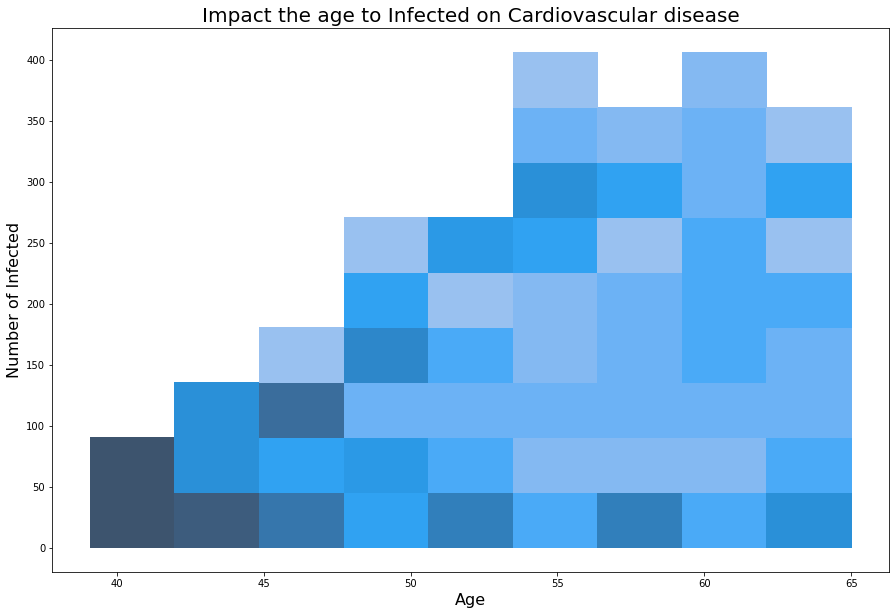

In [119]:
train_Q1=train[train.disease==1].groupby('age').count()

plt.figure(figsize = [15,10])
colors = sns.color_palette('pastel')
sns.histplot(data=train_Q1, x=train_Q1.index, y="disease")

plt.title('Impact the age to Infected on Cardiovascular disease', fontsize = 20)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Number of Infected", fontsize = 16);

#### Comment: the above plot show us when the age increases the number of Infected increases, so the age important vector in Cardiovascular disease 

<AxesSubplot:title={'center':'Distribution of Genders (1- women; 2- men)'}, xlabel='Gender', ylabel='Number of Infected'>

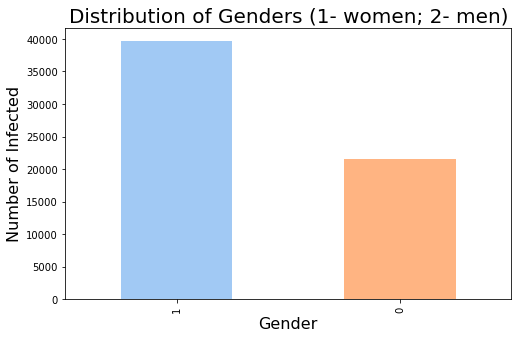

In [56]:
# gender Distribution
fig, ax = plt.subplots(figsize = (8, 5))
ax.set_title('Distribution of Genders (1- women; 2- men)', fontsize = 20)
ax.set_xlabel("Gender", fontsize = 16)
ax.set_ylabel("Number of Infected", fontsize = 16)
colors = sns.color_palette('pastel')[0:2]
train["gender_women"].value_counts().plot(ax = ax, kind = "bar", color = colors)

#### Comment: the above plot show us that women have the highest infected on Cardiovascular disease.

Text(-2.6999999999999957, 0.5, 'Number of Infected')

<Figure size 1080x720 with 0 Axes>

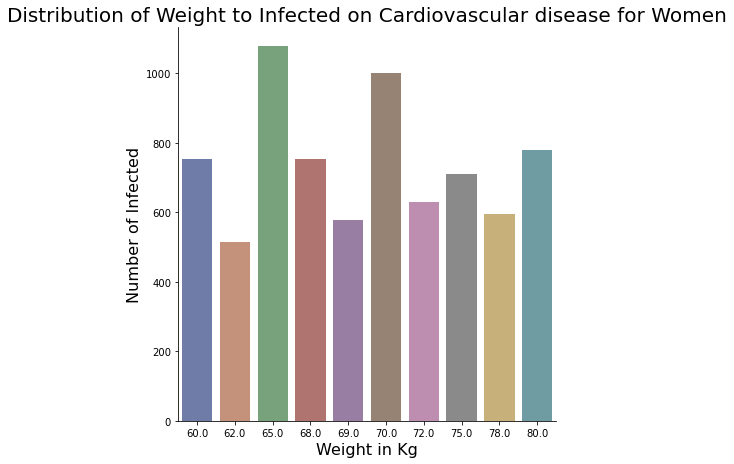

In [57]:
# two plot for women and man because we can not combin both genders in the same scale.

train_Q4_woman=train[(train.gender_women==1) & (train.disease==1)].groupby('weight').count().sort_values(by='disease',ascending=False).head(10)

plt.figure(figsize = [15,10])
colors = sns.color_palette('pastel')[0:10]
sns.catplot(data=train_Q4_woman, kind="bar",x=train_Q4_woman.index, y="disease", ci="sd", palette="dark", alpha=.6, height=6, color=colors)
plt.title('Distribution of Weight to Infected on Cardiovascular disease for Women', fontsize = 20)
plt.xlabel("Weight in Kg", fontsize = 16)
plt.ylabel("Number of Infected", fontsize = 16)

Text(3.6750000000000043, 0.5, 'Number of Infected')

<Figure size 1080x720 with 0 Axes>

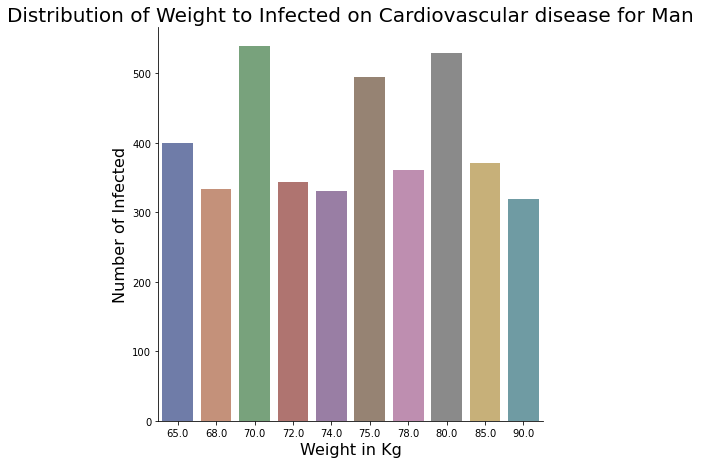

In [58]:
train_Q4_man=train[(train.gender_women==0) & (train.disease==1)].groupby('weight').count().sort_values(by='disease',ascending=False).head(10)

plt.figure(figsize = [15,10])
colors = sns.color_palette('pastel')[0:10]
sns.catplot(data=train_Q4_man, kind="bar",x=train_Q4_man.index, y="disease", ci="sd", palette="dark", alpha=.6, height=6,color=colors)
plt.title('Distribution of Weight to Infected on Cardiovascular disease for Man', fontsize = 20)
plt.xlabel("Weight in Kg", fontsize = 16)
plt.ylabel("Number of Infected", fontsize = 16)

####  Comment: as is shown in the two above plots, that the weight not factor in infection on Cardiovascular disease.

In [59]:
train_Q3=train[train.disease==1].groupby('smoke').count()
train_Q3['The ratio of smoking patient gitting the Cardiovascular Disease']=train_Q3['disease']/sum(train['disease'])

train_Q3=pd.DataFrame(train_Q3['The ratio of smoking patient gitting the Cardiovascular Disease'])
train_Q3.rename(index={0:'Not Smokers', 1:'Smokers'},  inplace=True)
train_Q3

,The ratio of smoking patient gitting the Cardiovascular Disease
smoke,
Not Smokers,0.915304
Smokers,0.084696


In [60]:
train_Q5=train[train.disease==1].groupby('active').count()
train_Q5['The ratio of active patient gitting the Cardiovascular Disease']=train_Q5['disease']/sum(train['disease'])

train_Q5=pd.DataFrame(train_Q5['The ratio of active patient gitting the Cardiovascular Disease'])
train_Q5.rename(index={0:'Not active', 1:'active'},  inplace=True)
train_Q5

,The ratio of active patient gitting the Cardiovascular Disease
active,
Not active,0.211774
active,0.788226


In [61]:
train_Q6=train[train.disease==1].groupby('alcohol').count()
train_Q6['The ratio of alcoholic patient gitting the Cardiovascular Disease']=train_Q6['disease']/sum(train['disease'])

train_Q6=pd.DataFrame(train_Q6['The ratio of alcoholic patient gitting the Cardiovascular Disease'])
train_Q6.rename(index={0:'Not Drinker', 1:'Drink alcohol'},  inplace=True)
train_Q6

,The ratio of alcoholic patient gitting the Cardiovascular Disease
alcohol,
Not Drinker,0.948573
Drink alcohol,0.051427


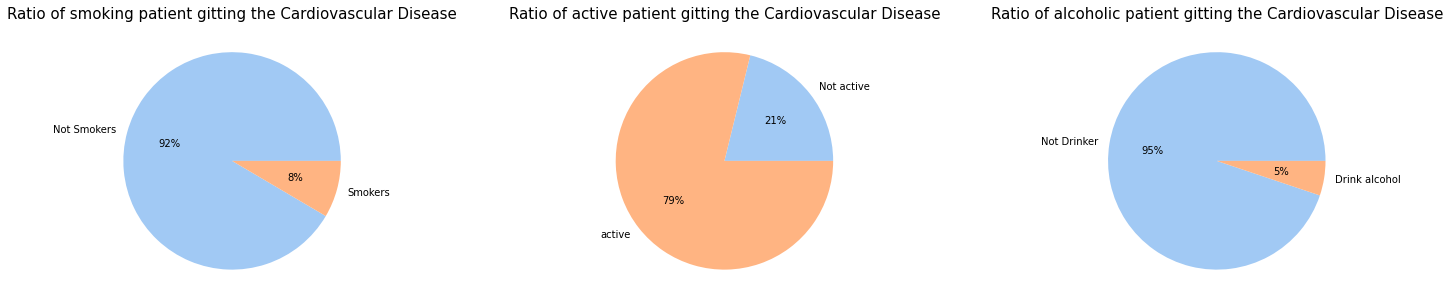

In [62]:
plt.figure(figsize=[25,5])

colors = sns.color_palette('pastel')[0:2]

plt.subplot(1,3,1)
plt.pie(train_Q3['The ratio of smoking patient gitting the Cardiovascular Disease'], labels =list(train_Q3.index),colors = colors, autopct='%.0f%%' )
plt.title('Ratio of smoking patient gitting the Cardiovascular Disease', fontsize = 15)



plt.subplot(1,3,2)
plt.pie(train_Q5['The ratio of active patient gitting the Cardiovascular Disease'], labels =list(train_Q5.index),colors = colors, autopct='%.0f%%' )
plt.title('Ratio of active patient gitting the Cardiovascular Disease', fontsize = 15)



plt.subplot(1,3,3)
plt.pie(train_Q6['The ratio of alcoholic patient gitting the Cardiovascular Disease'], labels =list(train_Q6.index),colors = colors, autopct='%.0f%%' )
plt.title('Ratio of alcoholic patient gitting the Cardiovascular Disease', fontsize = 15)


plt.show()

#### Comment: as is shown in the above values and plots there is no relation between the patient have the disease and wrong practices.

### Pairplot

In [ ]:
plt.figure(figsize = [20,15])

sns.pairplot(train, hue='disease');

<AxesSubplot:>

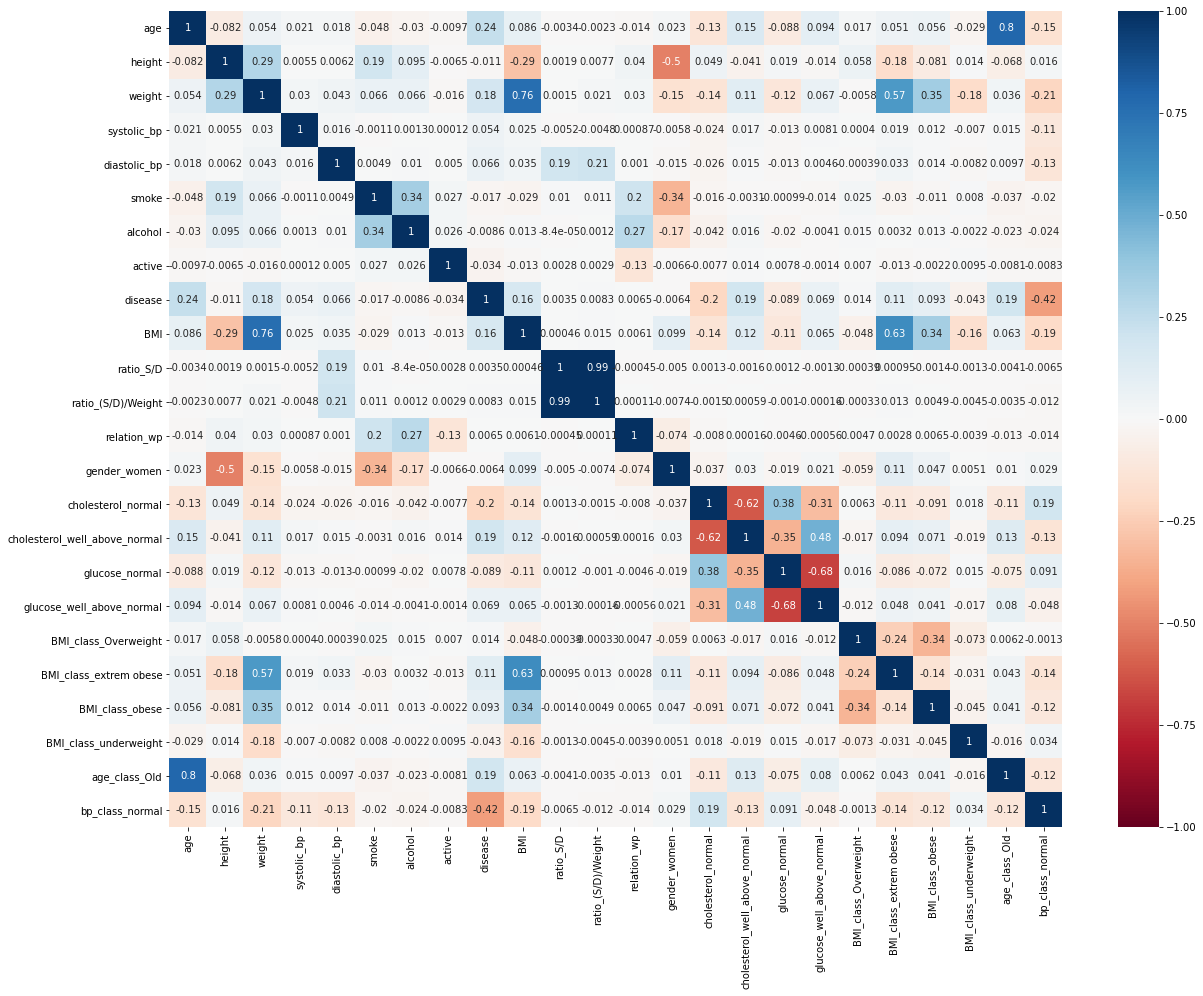

In [63]:
plt.figure(figsize = [20,15])

sns.heatmap(df.corr(),annot_kws={"fontsize":10},annot=True,vmin=-1, vmax=1,cmap="RdBu")

In [64]:
train.columns

Index(['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'smoke',
       'alcohol', 'active', 'BMI', 'ratio_S/D', 'ratio_(S/D)/Weight',
       'relation_wp', 'gender_women', 'cholesterol_normal',
       'cholesterol_well_above_normal', 'glucose_normal',
       'glucose_well_above_normal', 'BMI_class_Overweight',
       'BMI_class_extrem obese', 'BMI_class_obese', 'BMI_class_underweight',
       'age_class_Old', 'bp_class_normal', 'disease'],
      dtype='object')

# Modeling


In [120]:
## split after removed the outliers

x1=train.drop('disease',axis=1)
y1=train[['disease']]
x_train,x_val,y_train,y_val= train_test_split(x1,y1 ,test_size=0.05, random_state=42)

### Model 1: Logistic Regression model 

- GridSearch

In [121]:
## best C parmeter for Logistic Regression

from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100,1000,10000,100000,1000000], scoring='average_precision',verbose=0,max_iter=300,random_state=50)
logCV.fit(x_train,y_train)
print("The best parameter C is",logCV.C_[0])

The best parameter C is 0.1


In [122]:
lr =LogisticRegression(C=0.1,verbose=0,max_iter=300,random_state=500)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7292163967646099

In [123]:
### metrics for the val

y_pred=lr.predict(x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7086460032626427

F1 Score:    0.679583781844277

Recall:      0.7699186991869919

Precision:   0.6082209377007065



#### Scaling 

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

In [125]:
lr =LogisticRegression(C=0.1,verbose=0,max_iter=300,random_state=500)
lr.fit(scaled_x_train,y_train)
lr.score(scaled_x_train,y_train)

0.7300578729542684

In [126]:
### metrics for the val

y_pred=lr.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7083197389885808

F1 Score:    0.6791098348887293

Recall:      0.7697314890154597

Precision:   0.6075786769428388



### Model 2: MLPClassifier

- GridSearch

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,40)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(scaled_x_train, y_train) 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [94]:
print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [92]:
mlpc = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (20,), learning_rate= 'constant', solver= 'adam',random_state=1, max_iter=100)
mlpc.fit(scaled_x_train, y_train)
mlpc.score(scaled_x_train,y_train)

0.7370987961738593

In [93]:
### metrics for the val

y_pred=mlpc.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7187601957585644

F1 Score:    0.7006944444444444

Recall:      0.762660619803477

Precision:   0.6480411046885035



### Model 3: knn model

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14, weights='uniform') ##< i did choose this parmeter after gridsearch it but in another notebook.
knn.fit(scaled_x_train, y_train)
knn.score(scaled_x_train, y_train)

0.7496350741014236

In [71]:
### metrics for the val

y_pred=knn.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.702446982055465

F1 Score:    0.6826722338204593

Recall:      0.744874715261959

Precision:   0.630057803468208



## Model 4: Decision Tree model

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=500, max_depth=3)
dtc.fit(scaled_x_train,y_train)
dtc.score(scaled_x_train,y_train)

0.7252837835517164

In [73]:
### metrics for the val

y_pred=dtc.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7132137030995106

F1 Score:    0.6963730569948187

Recall:      0.7533632286995515

Precision:   0.6473988439306358



## Model 5:Naive Bayes Model

In [75]:
from sklearn.naive_bayes import  GaussianNB

nb = GaussianNB()
nb.fit(scaled_x_train, y_train)
nb.score(scaled_x_train, y_train)

0.7117858185502567

In [76]:
### metrics for the val

y_pred=nb.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.6900489396411092

F1 Score:    0.6647847565278757

Recall:      0.7376664056382146

Precision:   0.605009633911368



#### Comment: After all these modeling the best fitting model is  MLP Classfier let see the Ensemble methods
_________________

## Ensemble Methods

### Bootstrap: Random forest model

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=50,
                          max_depth=9,
                          random_state=4)
rfc.fit(scaled_x_train,y_train)
rfc.score(scaled_x_train,y_train)

0.745118579450808

In [78]:
### metrics for the val

y_pred=rfc.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7243066884176182

F1 Score:    0.703820539782685

Recall:      0.7746913580246914

Precision:   0.6448298008991651



### XGBoost (Extreme Gradient Boosting)

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier( n_estimators=50,
                            max_depth=6, learning_rate=0.13,
                            reg_lambda=5, scale_pos_weight=1)
xgb.fit(scaled_x_train,y_train)
xgb.score(scaled_x_train,y_train)

0.7469904346482115

In [102]:
### metrics for the val

y_pred=gbc.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7230016313213703

F1 Score:    0.7103377686796316

Recall:      0.75764192139738

Precision:   0.6685934489402697



### Max Voting


In [95]:
models = ['mlpc' ,'rfc','xgb'] # Best three models
model_vars = [eval(n) for n in models]
model_list = list(zip(models, model_vars))

In [96]:
from sklearn.ensemble import VotingClassifier

voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(scaled_x_train, y_train)
voting_classifer.score(scaled_x_train, y_train)

0.7446549088973228

In [97]:
### metrics for the val

y_pred=voting_classifer.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7210440456769984

F1 Score:    0.7052740434332989

Recall:      0.7611607142857143

Precision:   0.6570327552986512




### Average Voting

In [98]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    n_jobs=-1)
voting_classifer.fit(scaled_x_train, y_train)
voting_classifer.score(scaled_x_train, y_train)

0.7445346980130858

In [99]:
### metrics for the val

y_pred = voting_classifer.predict(scaled_x_val)
My_metrics(y_val, y_pred)

Accuracy:    0.7210440456769984

F1 Score:    0.7056798623063684

Recall:      0.7603857566765578

Precision:   0.6583172768143867



## Stacking Classifier

In [105]:
from sklearn.ensemble import StackingClassifier

estimators = [
('rfc', RandomForestClassifier(n_estimators=50,max_depth=9,random_state=4)),
('xgb', XGBClassifier( n_estimators=50, max_depth=6, learning_rate=0.13, reg_lambda=5, scale_pos_weight=1))
,('voting_classifer', VotingClassifier(estimators=model_list,voting='soft', n_jobs=-1))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(scaled_x_train, y_train)
clf.score(scaled_x_train, y_train)

0.7444660060792362

In [106]:
### metrics for the val

Y_pred=gbc.predict(scaled_x_val)
My_metrics(y_val,y_pred)

Accuracy:    0.7230016313213703

F1 Score:    0.7103377686796316

Recall:      0.75764192139738

Precision:   0.6685934489402697



#### Comment: after ensamble methods the best fitting models are  xgboosting , Average Voting, Random forest model, and Stacking Classifier
____________________


## Polynomial and  Feature selaction methods 

###  Feature selaction

[0.18855556 0.10505662 0.09031669 0.06836384 0.0431226  0.00828389
 0.00671397 0.01248618 0.113518   0.03617595 0.0895497  0.00055379
 0.01558798 0.02097266 0.02030047 0.00923075 0.00505369 0.00767228
 0.00462017 0.0051469  0.00117423 0.0240189  0.1235252 ]


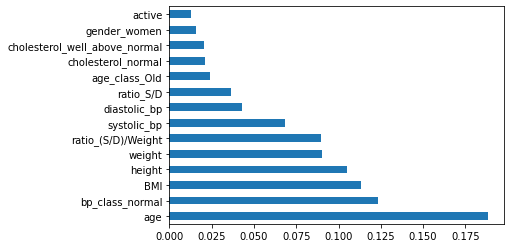

In [107]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [108]:
train.columns

Index(['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'smoke',
       'alcohol', 'active', 'BMI', 'ratio_S/D', 'ratio_(S/D)/Weight',
       'relation_wp', 'gender_women', 'cholesterol_normal',
       'cholesterol_well_above_normal', 'glucose_normal',
       'glucose_well_above_normal', 'BMI_class_Overweight',
       'BMI_class_extrem obese', 'BMI_class_obese', 'BMI_class_underweight',
       'age_class_Old', 'bp_class_normal', 'disease'],
      dtype='object')

In [109]:
  
X = train[[ 'age','BMI','bp_class_normal','height','weight','systolic_bp','diastolic_bp','cholesterol_well_above_normal','age_class_Old','ratio_(S/D)/Weight','ratio_S/D','cholesterol_normal','gender_women','active']]
Y = train['disease']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y ,test_size=0.05, random_state=42)
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train ,test_size=0.05, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

#### Logistic Regression

In [110]:
lr =LogisticRegression(C=0.1,verbose=0,max_iter=300,random_state=500)
lr.fit(scaled_X_train,Y_train)
lr.score(scaled_X_train,Y_train)

0.7293335020517363

In [111]:
### metrics for the val

y_pred=lr.predict(scaled_X_val)
My_metrics(Y_val,y_pred)

Accuracy:    0.7269917582417582

F1 Score:    0.6943483275663207

Recall:      0.7724550898203593

Precision:   0.630586592178771



 #### MLP Classfier

In [112]:
mlpc = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (20,), learning_rate= 'constant', solver= 'adam',random_state=1, max_iter=100)
mlpc.fit(scaled_X_train, Y_train)
mlpc.score(scaled_X_train,Y_train)

0.7356423651909832

In [113]:
### metrics for the val

y_pred=mlpc.predict(scaled_X_val)
My_metrics(Y_val,y_pred)

Accuracy:    0.7372939560439561

F1 Score:    0.7229264759145239

Recall:      0.7509405568096313

Precision:   0.696927374301676



#### Random Forest Classifier

In [114]:
rfc= RandomForestClassifier(n_estimators=50,
                          max_depth=9,
                          random_state=4)
rfc.fit(scaled_X_train,Y_train)
rfc.score(scaled_X_train,Y_train)

0.7453858529619118

In [115]:
### metrics for the val

y_pred=rfc.predict(scaled_X_val)
My_metrics(Y_val,y_pred)

Accuracy:    0.7321428571428571

F1 Score:    0.710467706013363

Recall:      0.7583201267828843

Precision:   0.6682960893854749



#### xgboosting

In [116]:
import xgboost as xgb

xgb = XGBClassifier( n_estimators=50,
                            max_depth=6, learning_rate=0.13,
                            reg_lambda=5, scale_pos_weight=1)
xgb.fit(scaled_X_train,Y_train)
xgb.score(scaled_X_train,Y_train)

0.7463981633796707

In [118]:
### metrics for the val

y_pred=xgb.predict(scaled_X_val)
My_metrics(Y_val,y_pred)

Accuracy:    0.7396978021978022

F1 Score:    0.7263537906137184

Recall:      0.7518684603886397

Precision:   0.702513966480447



#### avarge voting

In [119]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    n_jobs=-1)
voting_classifer.fit(scaled_X_train, Y_train)
voting_classifer.score(scaled_X_train, Y_train)

0.7435962327590881

In [120]:
### metrics for the val

y_pred = voting_classifer.predict(scaled_X_val)
My_metrics(Y_val, y_pred)

Accuracy:    0.7379807692307693

F1 Score:    0.7208196121478229

Recall:      0.7571099154496541

Precision:   0.6878491620111732



#### Stacking Classifier

In [126]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(scaled_X_train, Y_train)
clf.score(scaled_X_train, Y_train)

0.7437046945895623

In [127]:
### metrics for the val

y_pred = clf.predict(scaled_X_val)
My_metrics(Y_val, y_pred)

Accuracy:    0.739010989010989

F1 Score:    0.7260273972602741

Recall:      0.7503725782414307

Precision:   0.7032122905027933



### Polynomial Feature

In [129]:
from sklearn.preprocessing import  PolynomialFeatures

rf_poly2 = XGBClassifier( n_estimators=50, max_depth=6, learning_rate=0.13,reg_lambda=5, scale_pos_weight=1) # performance with best model
poly2 = PolynomialFeatures(degree=2) 
poly_X_train= poly2.fit_transform(scaled_X_train)
poly_X_val= poly2.transform(scaled_X_val)
rf_poly2.fit(poly_X_train, Y_train)
rf_poly2.score(poly_X_train, Y_train)

0.7522370252535295

In [131]:
### metrics for the val

y_pred=rf_poly2.predict(poly_X_val)
My_metrics(Y_val,y_pred)

Accuracy:    0.7376373626373627

F1 Score:    0.723388848660391

Recall:      0.7511278195488722

Precision:   0.6976256983240223



#### Comment: Feature selaction did improve the models a little 

## GridSearch

#### Gridsearch on best fitting which is  Extreme Gradient Boosting

In [132]:
from xgboost import XGBClassifier

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}


grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [135]:
grid_search.fit(scaled_X_train, Y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


XGBClassifier(max_depth=4, nthread=4, seed=42)

## Testing on selected model


#### Besed on our best fitting on the data the best model is the Extreme Gradient Boosting.

In [127]:
x_train = pd.concat([x_train, x_val])
y_train = pd.concat([y_train, y_val])

x_train = x_train[[ 'age','BMI','bp_class_normal','height','weight','systolic_bp','diastolic_bp','cholesterol_well_above_normal','age_class_Old','ratio_(S/D)/Weight','ratio_S/D','cholesterol_normal','gender_women','active']]
x_test = x_test[[ 'age','BMI','bp_class_normal','height','weight','systolic_bp','diastolic_bp','cholesterol_well_above_normal','age_class_Old','ratio_(S/D)/Weight','ratio_S/D','cholesterol_normal','gender_women','active']]


scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [128]:
import xgboost as xgb

xgb = xgb.XGBClassifier(max_depth=4, nthread=4, seed=42)
xgb.fit(scaled_x_train,y_train)
xgb.score(scaled_x_train,y_train)

[11:08:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7450894022448447

In [129]:
y_pred=xgb.predict(scaled_x_test)
My_metrics(y_test,y_pred)

Accuracy:    0.736948370349005

F1 Score:    0.7287328970850685

Recall:      0.7589838909541512

Precision:   0.7008009153318078



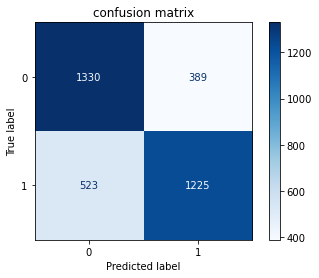

In [130]:
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve

plot_confusion_matrix(xgb, scaled_x_test, y_test, cmap=plt.cm.Blues)  
plt.title('confusion matrix');

plt.show()

In [131]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1719
           1       0.76      0.70      0.73      1748

    accuracy                           0.74      3467
   macro avg       0.74      0.74      0.74      3467
weighted avg       0.74      0.74      0.74      3467



ROC AUC score =  0.7990639680618954


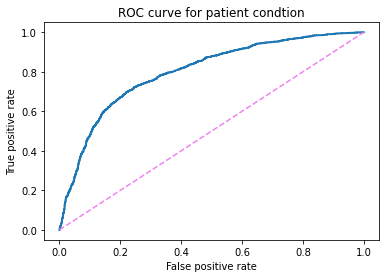

In [132]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(scaled_x_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for patient condtion');
print("ROC AUC score = ", roc_auc_score(y_test, xgb.predict_proba(scaled_x_test)[:,1]))